In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import OPTICS, KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import plotly.express as px
from matplotlib import pyplot as plt
import os

In [2]:
processed_data = pd.read_csv("../data/tsneDF.csv", index_col=0)
processed_data.head()

,0,1,2
A,13.799941,10.532969,-1.030204
AAL,-9.694422,-9.272758,0.516964
AAPL,0.214237,18.759165,-2.062645
ABBV,17.133244,3.435651,-7.875369
ABT,12.487381,8.524612,-5.642640


In [18]:
labels = {}
optics_clustering = OPTICS(min_samples=9, xi=0.025).fit(processed_data)
# xi determines the minimum steepness on the reachability plot that constitutes a cluster boundary.
n_stock_in_cluster = {}

labels['optics'] = optics_clustering.labels_

data_clusters = processed_data
data_clusters['optics_label'] = labels['optics']

number_of_clusters = len(np.unique(labels['optics']))
score = silhouette_score(processed_data, labels['optics'])
print(f"OPTICS clustering:\nNumber of clusters: {number_of_clusters}")
print(f"Silhouette score: {score}")

OPTICS clustering:
Number of clusters: 24
Silhouette score: 0.49696041020128184


In [11]:
kmeans_clustering = KMeans(n_clusters=15, n_init=8).fit(processed_data)
labels['kmeans'] = kmeans_clustering.labels_
data_clusters['kmeans_label'] = labels['kmeans']

number_of_clusters = len(np.unique(labels['kmeans']))
score = silhouette_score(processed_data, labels['kmeans'])
print(f"KMeans clustering:\nNumber of clusters: {number_of_clusters}")
print(f"Silhouette score: {score}")

C:\Users\18363\miniconda3\envs\finance\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans clustering:
Number of clusters: 15
Silhouette score: 0.48320036000470823


In [14]:
dbscan_clustering = DBSCAN(eps=4.6, min_samples=7).fit(processed_data)
# eps: the maximum distance between two samples for one to be considered as in the neighborhood of the other.
labels['dbscan'] = dbscan_clustering.labels_
data_clusters['dbscan_label'] = labels['dbscan']

number_of_clusters = len(np.unique(labels['dbscan']))
score = silhouette_score(processed_data, labels['dbscan'])
print(f"DBSCAN clustering:\nNumber of clusters: {number_of_clusters}")
print(score)

DBSCAN clustering:
Number of clusters: 20
0.4928400161982713


In [17]:
hierarchy_clustering = AgglomerativeClustering(n_clusters=15).fit(processed_data)
labels['hierarchy'] = hierarchy_clustering.labels_
data_clusters['hierarchy_label'] = labels['hierarchy']

number_of_clusters = len(np.unique(labels['hierarchy']))
score = silhouette_score(processed_data, labels['hierarchy'])
print(f"Hierarchical clustering:\nNumber of clusters: {number_of_clusters}")
print(score)

n_stock_in_cluster['hierarchy'] = []
for label in np.unique(labels['hierarchy']):
    n_stock_in_cluster['hierarchy'].append(len(data_clusters[data_clusters["hierarchy_label"]==label]))
print(f"Number of stocks in each cluster: {n_stock_in_cluster['hierarchy']}")

Hierarchical clustering:
Number of clusters: 15
0.5239078804717383
Number of stocks in each cluster: [46, 30, 34, 43, 47, 19, 25, 16, 29, 54, 16, 50, 28, 19, 22]


In [19]:
data_clusters.to_csv("../data/cluster.csv")
data_clusters.head()

,0,1,2,optics_label,kmeans_label,dbscan_label,hierarchy_label
A,13.799941,10.532969,-1.030204,0,1,0,4
AAL,-9.694422,-9.272758,0.516964,6,14,1,1
AAPL,0.214237,18.759165,-2.062645,4,12,2,9
ABBV,17.133244,3.435651,-7.875369,2,1,0,4
ABT,12.487381,8.524612,-5.642640,-1,1,0,4


Text(0.5, 0.92, 'Hierarchy clustering')

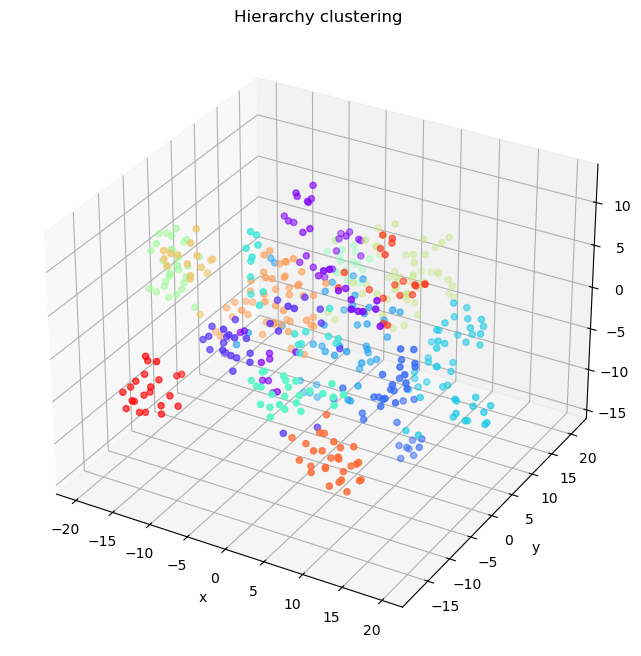

In [20]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x = processed_data.loc[:,'0']
y = processed_data.loc[:,'1']
z = processed_data.loc[:,'2']
c = processed_data.loc[:,'hierarchy_label']
ax.scatter(x, y, z, c=c, marker='o', cmap='rainbow')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Hierarchy clustering")

Text(0.5, 0.92, 'DBSCAN clustering')

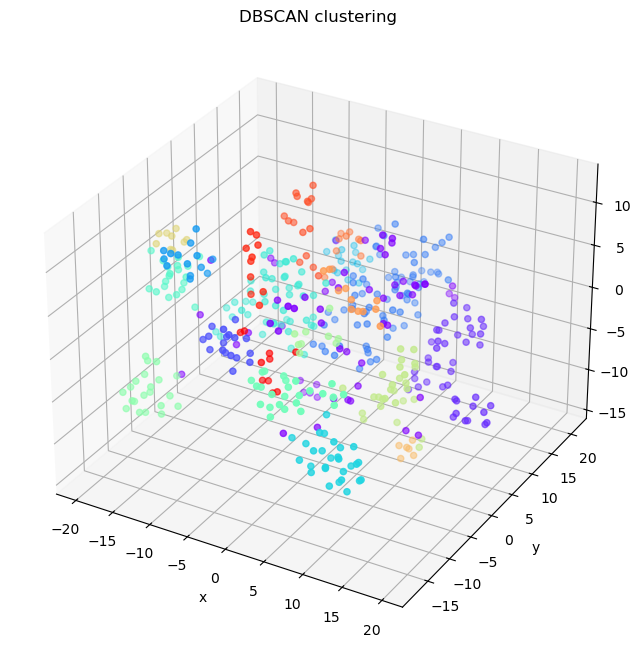

In [21]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x = processed_data.loc[:,'0']
y = processed_data.loc[:,'1']
z = processed_data.loc[:,'2']
c = processed_data.loc[:,'dbscan_label']
ax.scatter(x, y, z, c=c, marker='o', cmap='rainbow')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("DBSCAN clustering")

Text(0.5, 0.92, 'K-means clustering')

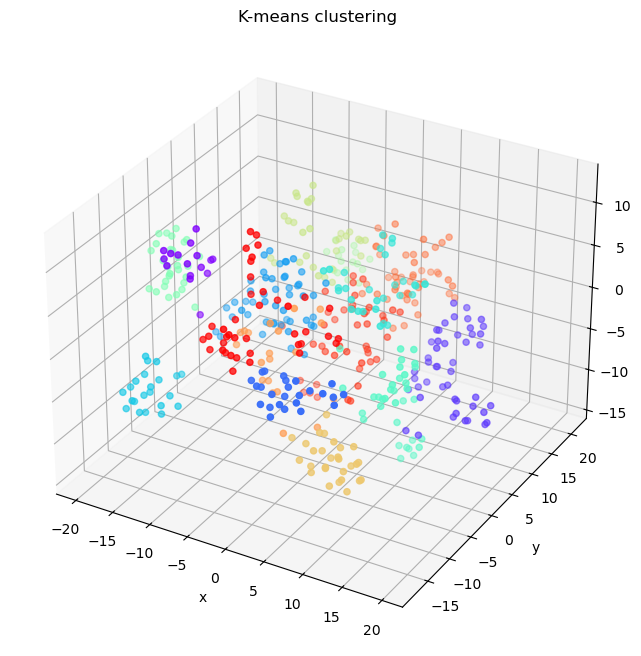

In [22]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x = processed_data.loc[:,'0']
y = processed_data.loc[:,'1']
z = processed_data.loc[:,'2']
c = processed_data.loc[:,'kmeans_label']
ax.scatter(x, y, z, c=c, marker='o', cmap='rainbow')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("K-means clustering")

Text(0.5, 0.92, 'OPTICS clustering')

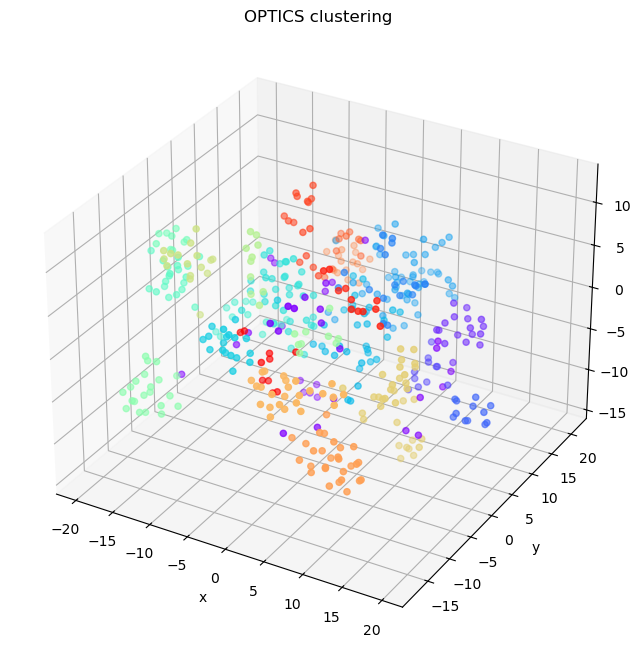

In [23]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x = processed_data.loc[:,'0']
y = processed_data.loc[:,'1']
z = processed_data.loc[:,'2']
c = processed_data.loc[:,'optics_label']
ax.scatter(x, y, z, c=c, marker='o', cmap='rainbow')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("OPTICS clustering")